# GNN Explainer

This notebook is designed to visualize the results of the GNN Explainer.

In [24]:
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

Configuring the experiment you want to visualize. These values should match the configuration:

> TODO: Unify configuration of experiments in yaml

In [25]:
logdir = '../log/'
expdir = 'syn1_base_h20_o20_explain'

In [26]:
# Load the produced masks

In [27]:
dirs = os.listdir(os.path.join(logdir, expdir))
dirs

['events.out.tfevents.1701262419.localhost.localdomain',
 'events.out.tfevents.1701262550.localhost.localdomain',
 'events.out.tfevents.1701262713.localhost.localdomain',
 'events.out.tfevents.1701263037.localhost.localdomain',
 'events.out.tfevents.1701314871.localhost.localdomain',
 'events.out.tfevents.1701314924.localhost.localdomain',
 'events.out.tfevents.1701346759.localhost.localdomain',
 'masked_adj_syn1_base_h20_o20_explainnode_idx_430graph_idx_-1.npy',
 'events.out.tfevents.1701418407.localhost.localdomain']

In [29]:
masks = []
# This would print all the files and directories
for file in dirs:
    if file.split('.')[-1] == 'npy':
        print(file)
        masks.append(file)

masked_adj_syn1_base_h20_o20_explainnode_idx_430graph_idx_-1.npy


In [30]:
def show_adjacency_full(mask, ax=None):
    adj = np.load(os.path.join(logdir, expdir, mask), allow_pickle=True)
    if ax is None:
        plt.figure()
        plt.imshow(adj);
    else:
        ax.imshow(adj)
    return adj

In [31]:
def filter_adj(adj):
    filt_adj = adj.copy()
    filt_adj[adj<0.8] = 0
    return filt_adj

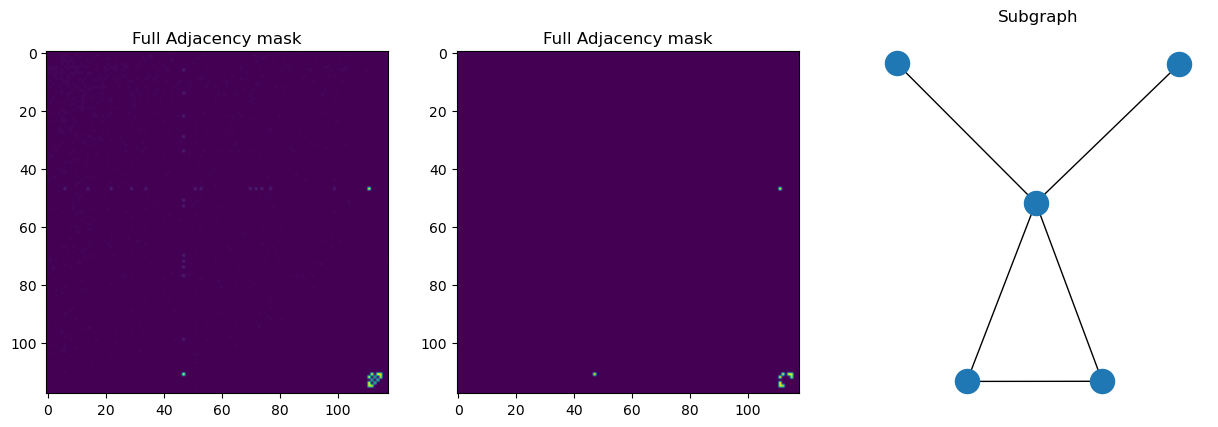

In [32]:
for m in masks: 

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    plt.title(str(m))
    
    # Full adjacency
    ax1.set_title('Full Adjacency mask')
    adj = show_adjacency_full(m, ax=ax1)
    
    # Filtered adjacency
    f = filter_adj(adj)
    ax2.set_title('Full Adjacency mask')
    ax2.imshow(f);
    
    # Plot subgraph
    ax3.set_title("Subgraph")
    G = nx.from_numpy_array(f)
    G.remove_nodes_from(list(nx.isolates(G)))
    nx.draw(G, ax=ax3)